In [8]:
import os
import cv2
import csv
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

### Data distribution across categories

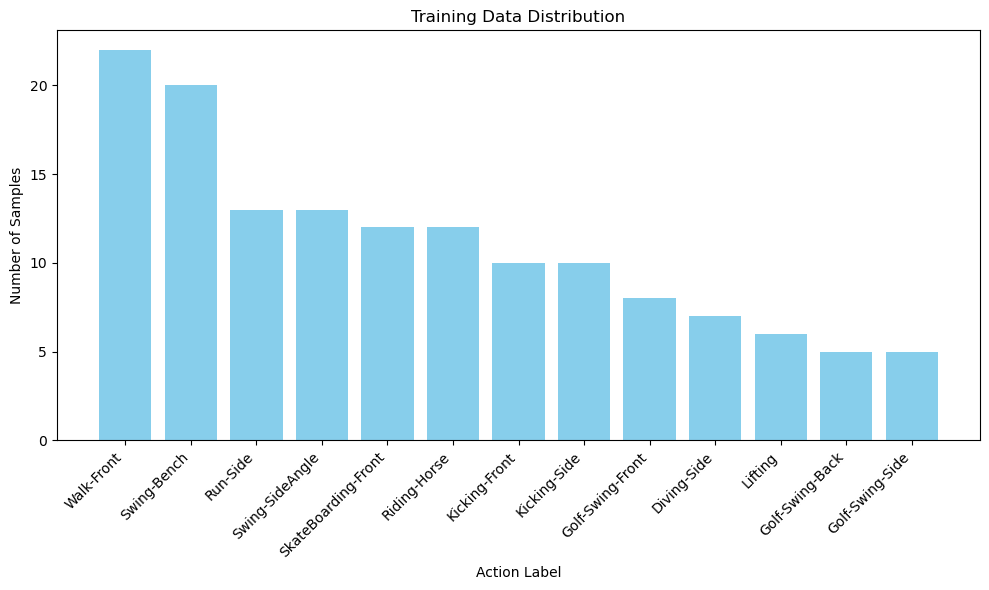

In [118]:

# Read the CSV file into a DataFrame
df = pd.read_csv('train_data.csv')

# Count the occurrences of each label
label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Action Label')
plt.ylabel('Number of Samples')
plt.title('Training Data Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Video Duration analysis

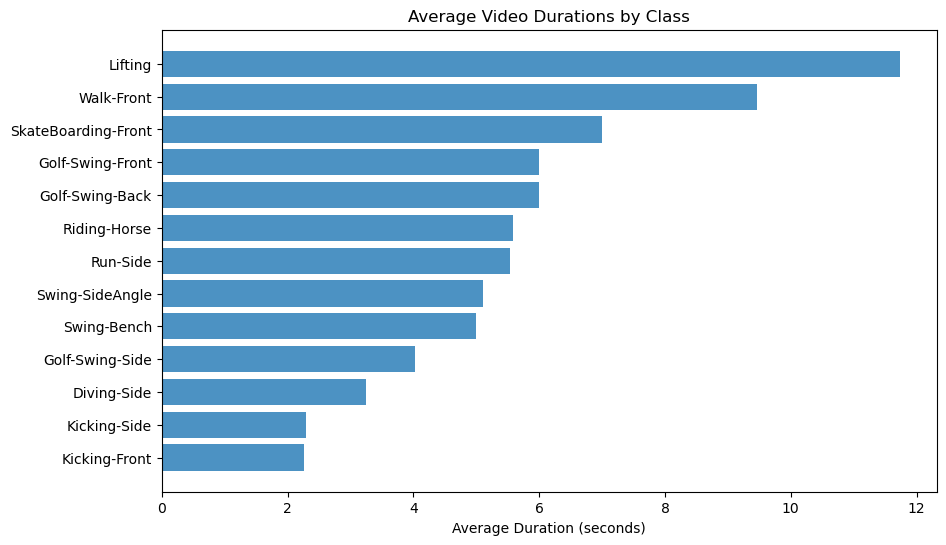

In [111]:
# Function to get video duration
def get_video_duration(video_path):
    cap = cv2.VideoCapture(video_path)
    
    # Get frame count and frame rate
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_rate = cap.get(cv2.CAP_PROP_FPS)

    # Calculate duration (in seconds)
    duration = frame_count / frame_rate
    cap.release()
    
    return duration

class_durations = {}
_videos = []
_labels = []
with open('train_data.csv', mode='r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        video_path, label = row
        _videos.append(video_path)
        _labels.append(label)
        if label not in class_durations:
            class_durations[label] = []
        class_durations[label].append(video_path)

# Calculate average duration for each class
class_avg_durations = {}
for label, video_paths in class_durations.items():
    durations = []
    for video_path in video_paths:
        duration = get_video_duration(video_path)
        durations.append(duration)
    avg_duration = sum(durations) / len(durations)
    class_avg_durations[label] = avg_duration


sorted_classes = sorted(class_avg_durations.items(), key=lambda x: x[1])
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_classes)), [avg_duration for _, avg_duration in sorted_classes], align='center', alpha=0.8)
plt.yticks(range(len(sorted_classes)), [label for label, _ in sorted_classes])
plt.xlabel('Average Duration (seconds)')
plt.title('Average Video Durations by Class')
plt.show()


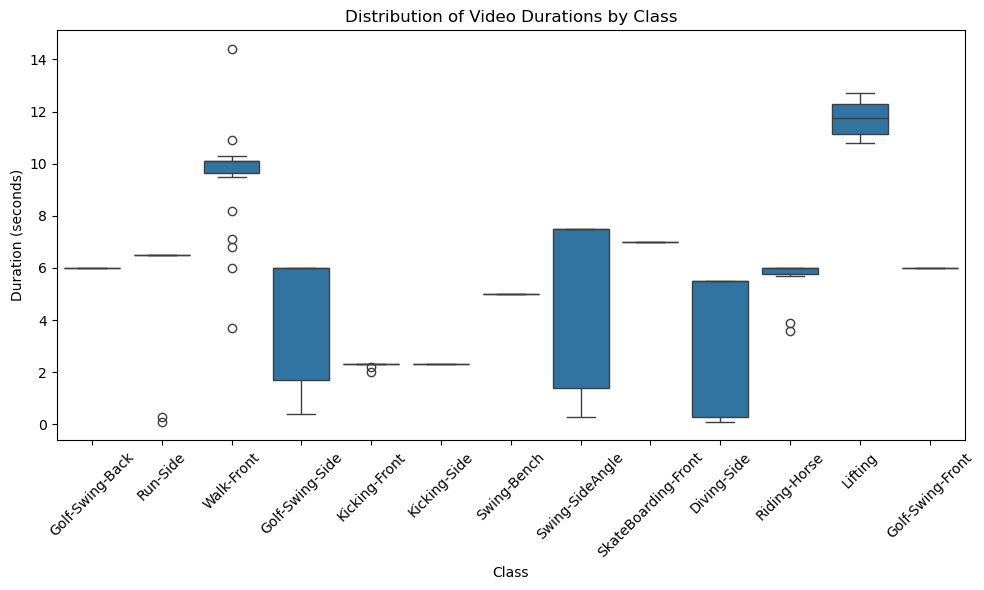

In [117]:
# Calculate durations for each video
durations = [get_video_duration(video_path) for video_path in _videos]

df = pd.DataFrame({'Label': _labels, 'Duration': durations})
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Duration', data=df)
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Duration (seconds)')
plt.title('Distribution of Video Durations by Class')
plt.tight_layout()
plt.show()

### Extract metadata from video files

In [150]:
# Function to extract metadata from video files
def extract_metadata(video_path):
    cap = cv2.VideoCapture(video_path)
    resolution = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    cap.release()
    return {'resolution': resolution, 'total_frames': total_frames, 'fps': fps}

# Extract metadata for each video file
metadata_list = []
for index, row in df.iterrows():
    video_path = row['video_path']
    label = row['label']
    metadata = extract_metadata(video_path)
    if metadata:
        metadata['video_path'] = video_path
        metadata['label'] = label
        metadata_list.append(metadata)

# Convert metadata list to DataFrame
metadata_df = pd.DataFrame(metadata_list)

In [140]:
display(metadata_df)
print(metadata_df.describe())

,resolution,total_frames,fps,video_path,label
0,"(720, 404)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Back
1,"(720, 576)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Back
2,"(720, 576)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Back
3,"(720, 480)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Back
4,"(720, 404)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Back
...,...,...,...,...,...
138,"(720, 480)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Front
139,"(720, 480)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Front
140,"(720, 480)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Front
141,"(720, 480)",60,10.0,/Users/joeycly/Desktop/UQ_Y2/sem1/STAT7007/pro...,Golf-Swing-Front


       total_frames    fps
count    143.000000  143.0
mean      58.335664   10.0
std       29.423078    0.0
min        1.000000   10.0
25%       50.000000   10.0
50%       60.000000   10.0
75%       70.000000   10.0
max      144.000000   10.0


In [ ]:
# sns.histplot(metadata_df['total_frames'], bins=20)
# plt.title('Total Frames Distribution')

In [ ]:
# # Plot histograms for each label for 'total_frames'
# plt.figure(figsize=(12, 6))
# for label, group in metadata_df.groupby('label'):
#     sns.histplot(data=group, x='total_frames', bins=20, label=label, alpha=0.7)

# plt.title('Total frame Distribution by Label')
# plt.xlabel(feature.capitalize())
# plt.ylabel('Frequency')
# plt.legend(title='Label')
# plt.show()